In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv("bank_transactions.csv")

In [2]:
print(data.shape)
# There are 1048567 observations and 9 columns

(1048567, 9)


In [3]:
data

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5
...,...,...,...,...,...,...,...,...,...
1048562,T1048563,C8020229,8/4/90,M,NEW DELHI,7635.19,18/9/16,184824,799.0
1048563,T1048564,C6459278,20/2/92,M,NASHIK,27311.42,18/9/16,183734,460.0
1048564,T1048565,C6412354,18/5/89,M,HYDERABAD,221757.06,18/9/16,183313,770.0
1048565,T1048566,C6420483,30/8/78,M,VISAKHAPATNAM,10117.87,18/9/16,184706,1000.0


In [4]:
data.info()

# CustomerDOB, CustGender, CustLocation, CustAccountBalance have missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048567 entries, 0 to 1048566
Data columns (total 9 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   TransactionID            1048567 non-null  object 
 1   CustomerID               1048567 non-null  object 
 2   CustomerDOB              1045170 non-null  object 
 3   CustGender               1047467 non-null  object 
 4   CustLocation             1048416 non-null  object 
 5   CustAccountBalance       1046198 non-null  float64
 6   TransactionDate          1048567 non-null  object 
 7   TransactionTime          1048567 non-null  int64  
 8   TransactionAmount (INR)  1048567 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 72.0+ MB


In [5]:
print("Number of missing values for each column")
data.isnull().sum()

Number of missing values for each column


TransactionID                 0
CustomerID                    0
CustomerDOB                3397
CustGender                 1100
CustLocation                151
CustAccountBalance         2369
TransactionDate               0
TransactionTime               0
TransactionAmount (INR)       0
dtype: int64

In [6]:
#Dropping the "Transaction ID" column since it has no bearing on analysis
data.drop(["TransactionID"],axis=1,inplace=True)

In [7]:
#Filling in missing values
custgender_mode = data.CustGender.mode().values[0]
data.CustGender.fillna(custgender_mode,inplace=True)

custlocation_mode = data.CustLocation.mode().values[0]
data.CustLocation.fillna(custlocation_mode,inplace=True)

custAB_median = data.CustAccountBalance.median()
data.CustAccountBalance.fillna(custAB_median,inplace=True)

In [8]:
# Splitting CustomerDOB, TransactionDate and TransactionTime into reading figures

data[["Birthdate", "Birthmonth", "Birthyear"]] = data["CustomerDOB"].str.split("/", expand = True)
data[["Tdate", "Tmonth", "Tyear"]] = data["TransactionDate"].str.split("/", expand = True)

time = []
for i in data.TransactionTime.values:
    hour = i//10000
    time.append(hour)

data["TransactionHour"] = time

In [9]:
#Dropping the below columns
data.drop(["CustomerDOB"],inplace=True,axis=1)
data.drop(["TransactionDate"],inplace=True,axis=1)
data.drop(["TransactionTime"],inplace=True,axis=1)

In [10]:
data

,CustomerID,CustGender,CustLocation,CustAccountBalance,TransactionAmount (INR),Birthdate,Birthmonth,Birthyear,Tdate,Tmonth,Tyear,TransactionHour
0,C5841053,F,JAMSHEDPUR,17819.05,25.0,10,1,94,2,8,16,14
1,C2142763,M,JHAJJAR,2270.69,27999.0,4,4,57,2,8,16,14
2,C4417068,F,MUMBAI,17874.44,459.0,26,11,96,2,8,16,14
3,C5342380,F,MUMBAI,866503.21,2060.0,14,9,73,2,8,16,14
4,C9031234,F,NAVI MUMBAI,6714.43,1762.5,24,3,88,2,8,16,18
...,...,...,...,...,...,...,...,...,...,...,...,...
1048562,C8020229,M,NEW DELHI,7635.19,799.0,8,4,90,18,9,16,18
1048563,C6459278,M,NASHIK,27311.42,460.0,20,2,92,18,9,16,18
1048564,C6412354,M,HYDERABAD,221757.06,770.0,18,5,89,18,9,16,18
1048565,C6420483,M,VISAKHAPATNAM,10117.87,1000.0,30,8,78,18,9,16,18


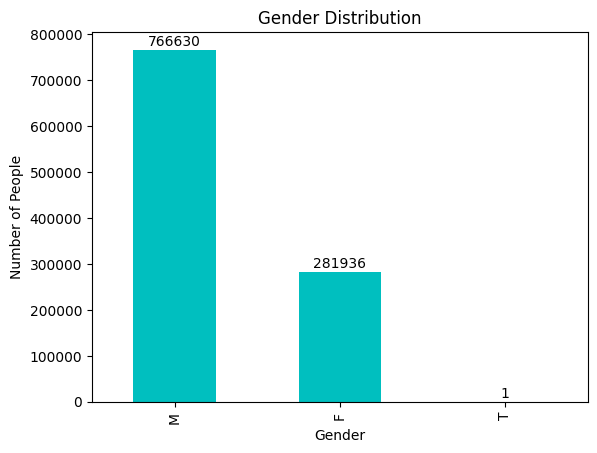

In [11]:
#Plotting Gender Distribution

gender = data['CustGender'].value_counts()
graph = gender.plot(kind='bar', color="c")
graph.set_title("Gender Distribution",)
graph.set_xlabel('Gender')
graph.set_ylabel('Number of People')

for rect in graph.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 1
    label = format(y_value)
    graph.annotate(label, (x_value, y_value), xytext=(0, space), textcoords="offset points", ha='center', va='bottom')
plt.show()

#Inference: There are a majority of male customers (73%), followed by female customers (27%) and transgender customers (1 customer)

In [12]:
#Calculating Age
data.Birthyear.fillna(data.Birthyear.median(),inplace=True)
age = []
difference = 0
for i in data.Birthyear.values:
    if int(i) < 16:
        difference = 16 - int(i)
    elif int(i) == 1800: #one observation with Birthyear 1800
        difference = 216
    else:
        difference = 100 - int(i) + 16
    age.append(difference)

data["Age"] = age

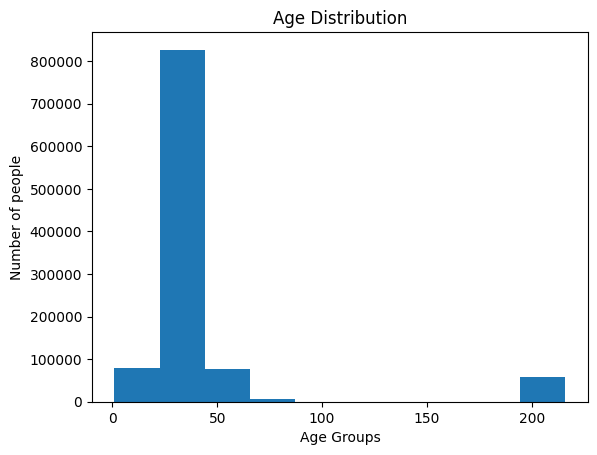

In [13]:
#Plotting Age Distribution

plt.hist(data.Age, bins = 10)
plt.title("Age Distribution")
plt.xlabel("Age Groups")
plt.ylabel("Number of people")
plt.show()

#Inference: The majority of customers are between 25-40 years of age. Those with ages > 200 are outliers, most likely with an error in their birthdate

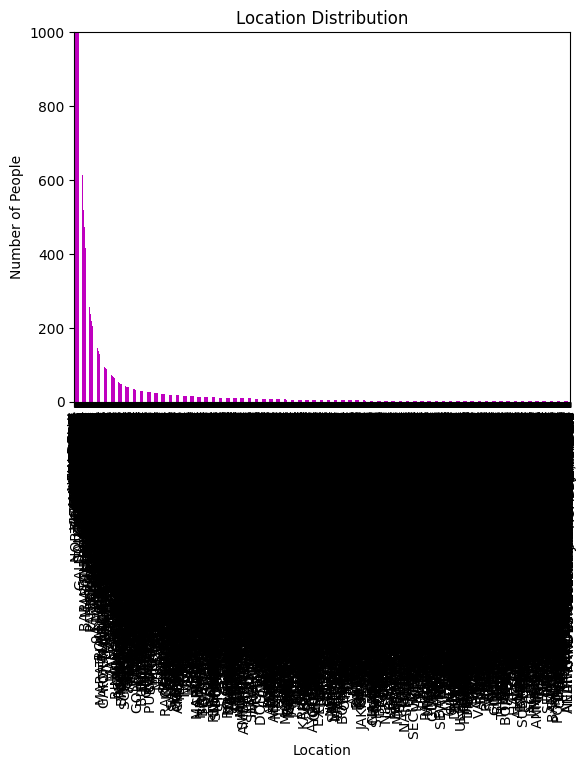

In [14]:
#Plotting Location Distribution

location = data['CustLocation'].value_counts()
graph = location.plot(kind='bar', color="m")
graph.set_title("Location Distribution",)
graph.set_xlabel('Location')
graph.set_ylabel('Number of People')
plt.ylim(0,1000)
plt.show()

#Inference: The maximum number of transactions were made in New Delhi

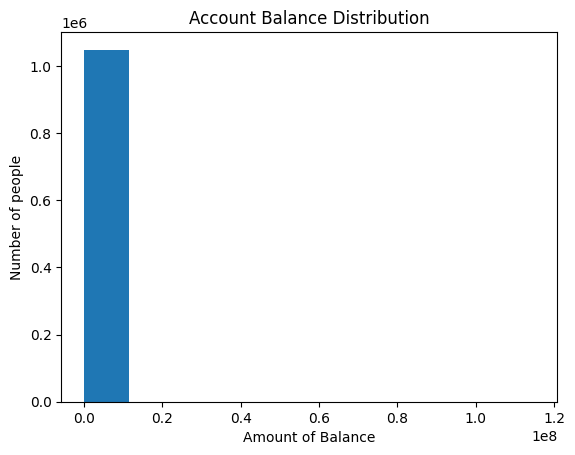

In [15]:
#Plotting Distribution of Account Balance

graph = plt.hist(data.CustAccountBalance, bins = 10)
plt.title("Account Balance Distribution")
plt.xlabel("Amount of Balance")
plt.ylabel("Number of people")

plt.show()

#Inference: A majority of account balances were under Rs. 1.5 Crore (0.15 x 10^8) indicating that a majority of customers ranged from poor to fairly rich

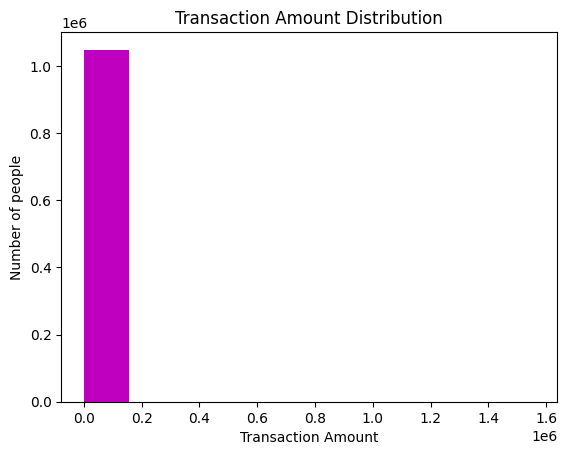

In [16]:
#Plotting Transaction Amount Distribution
graph = plt.hist(data["TransactionAmount (INR)"], bins = 10, color = 'm')
plt.title("Transaction Amount Distribution")
plt.xlabel("Transaction Amount")
plt.ylabel("Number of people")

plt.show()

#Inference: Most transactions were under Rs. 2 lakhs (0.2 x 10^6) indicating low to relatively high transaction amounts

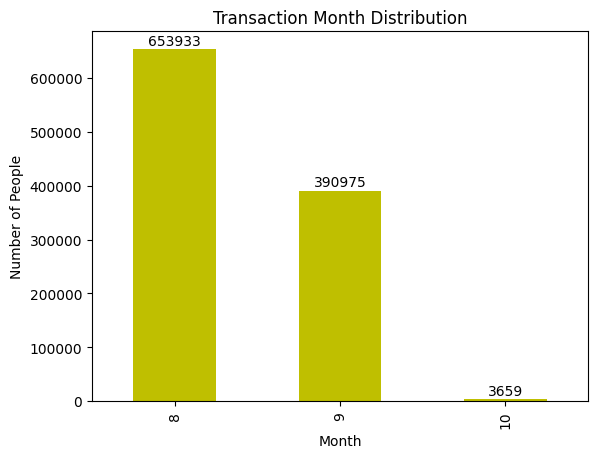

In [17]:
#Plotting Frequency of Transactions in each month

month = data['Tmonth'].value_counts()
graph = month.plot(kind='bar', color="y")
graph.set_title("Transaction Month Distribution",)
graph.set_xlabel('Month')
graph.set_ylabel('Number of People')

for rect in graph.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 1
    label = format(y_value)
    graph.annotate(label, (x_value, y_value), xytext=(0, space), textcoords="offset points", ha='center', va='bottom')
plt.show()

#Inference: August had the maximum number of transactions, followed by September and October. 
#In fact there were approximately 1/190th transactions in October as there were in August.

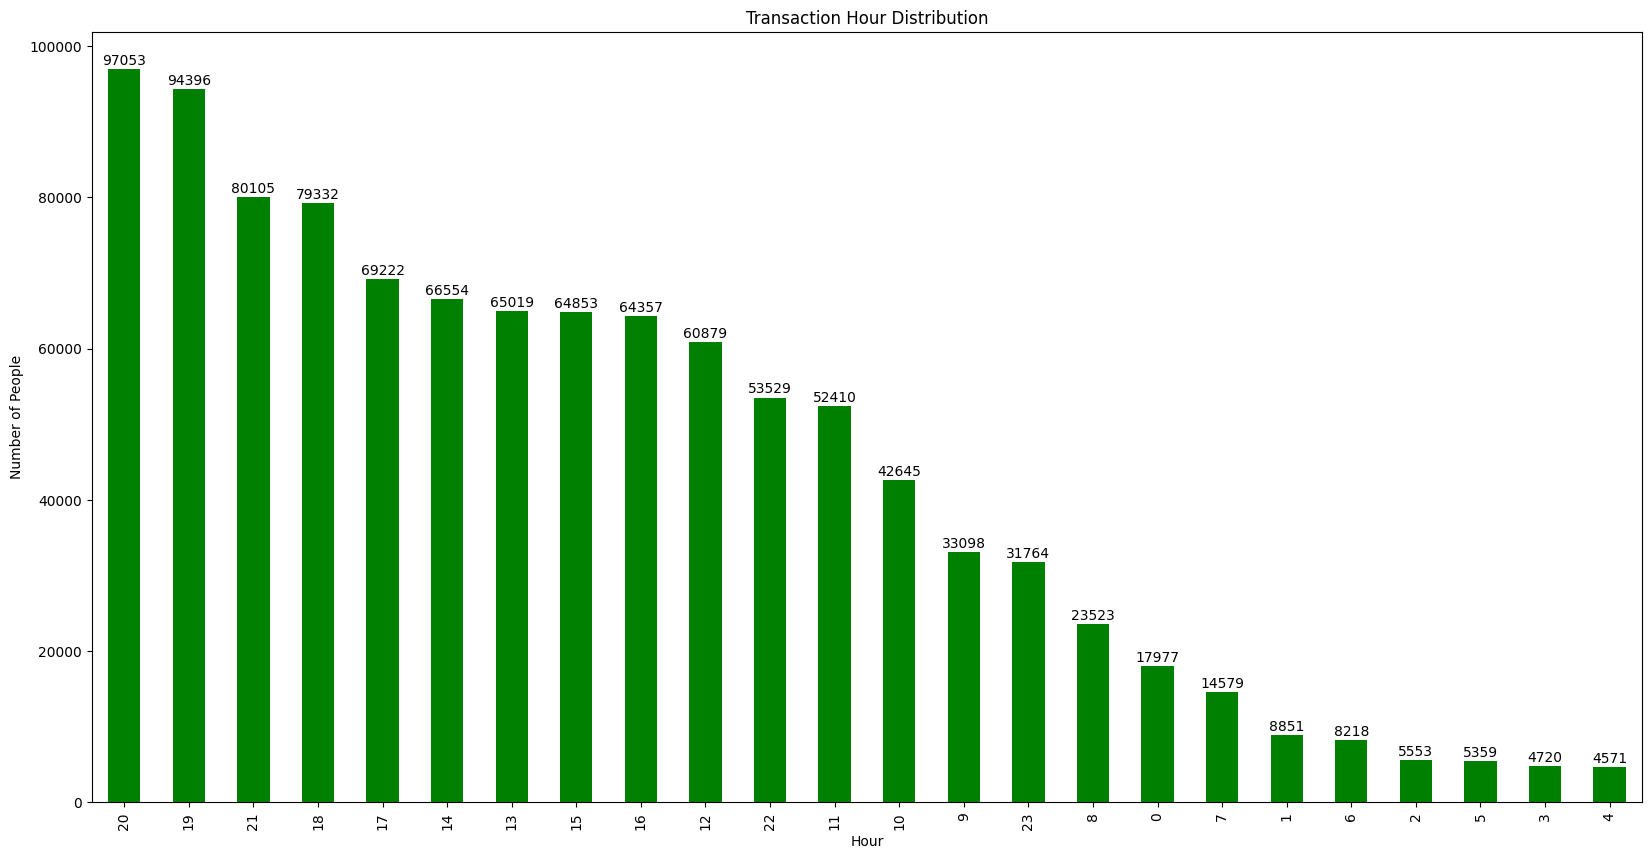

In [18]:
#Plotting Frequency of Transaction Hour

plt.figure(figsize=(20,10))
hour = data['TransactionHour'].value_counts()
graph = hour.plot(kind='bar', color="g")
graph.set_title("Transaction Hour Distribution",)
graph.set_xlabel('Hour')
graph.set_ylabel('Number of People')

for rect in graph.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 1
    label = format(y_value)
    graph.annotate(label, (x_value, y_value), xytext=(0, space), textcoords="offset points", ha='center', va='bottom')
plt.show()

# Inference: Most transactions occured late evening between 6-9 p.m.

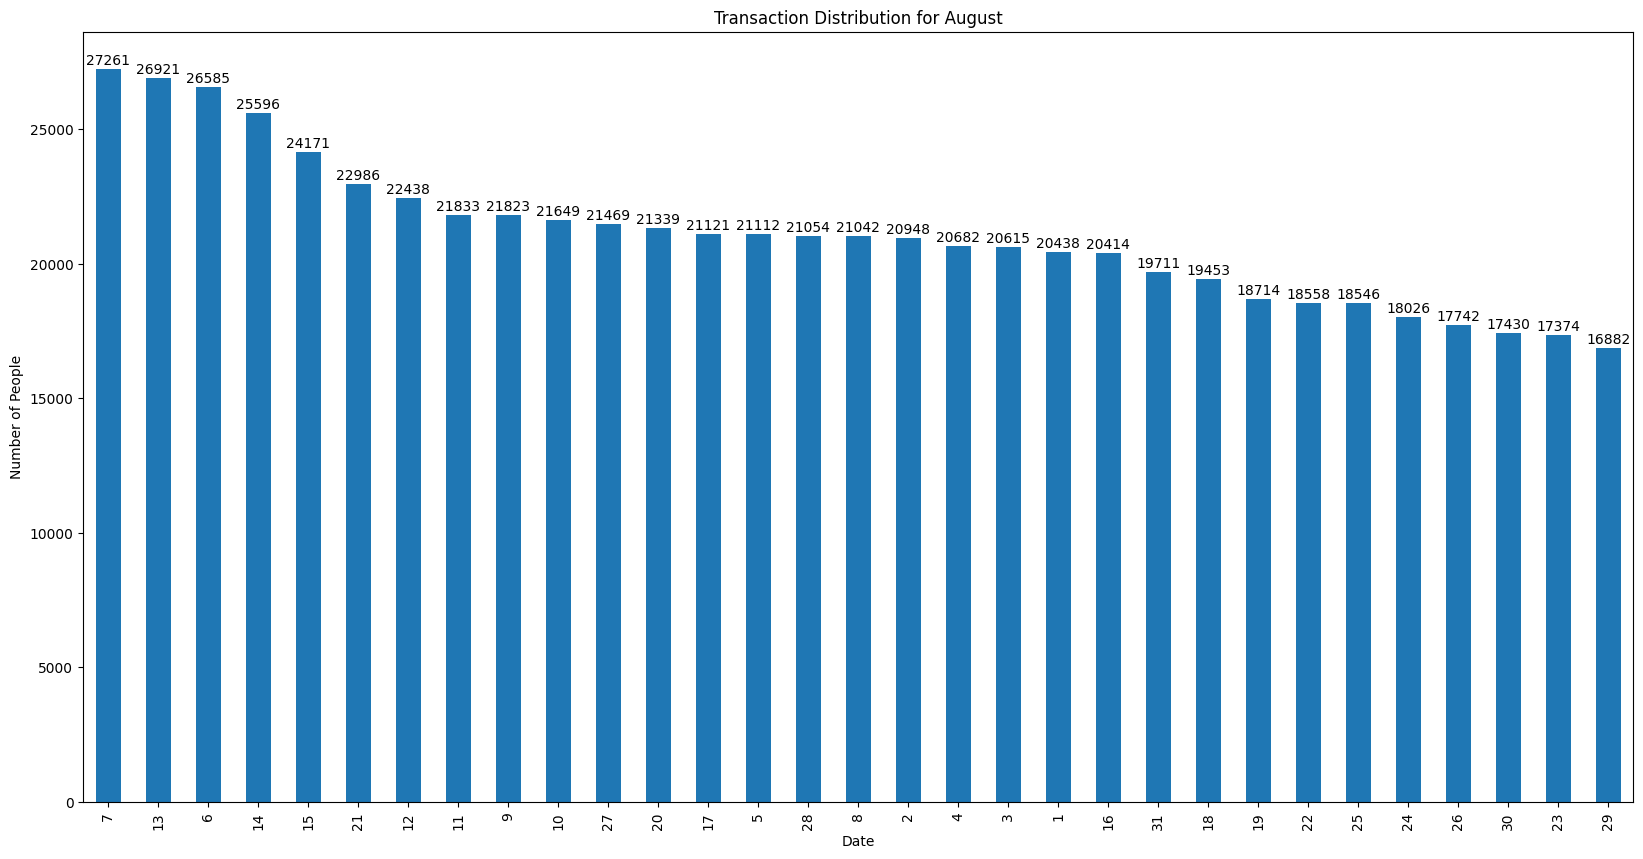

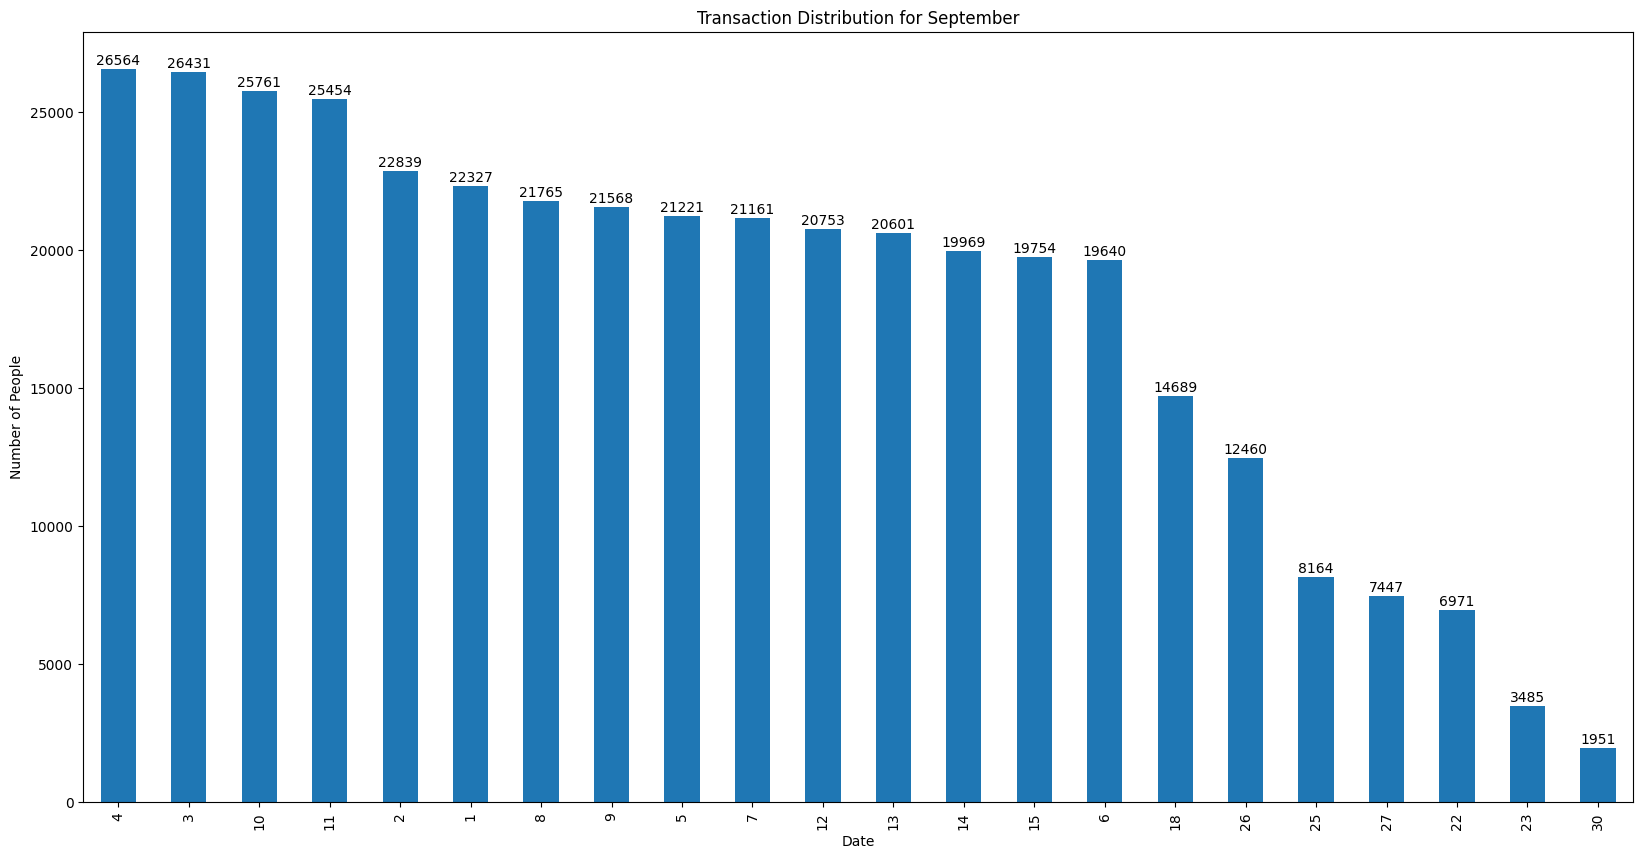

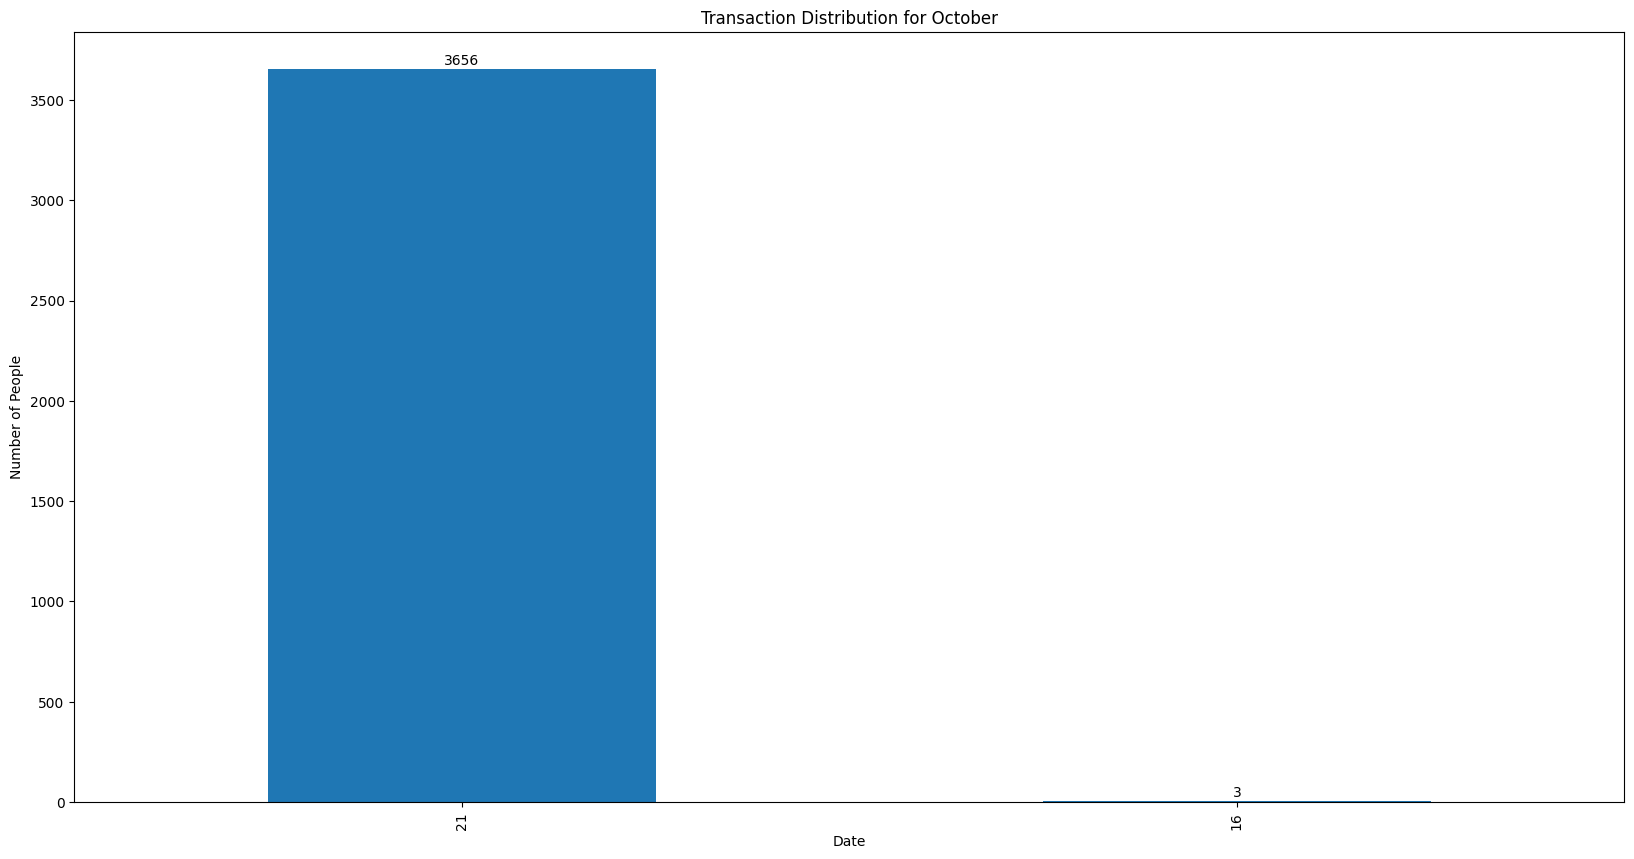

In [19]:
#Plotting Transaction Distribution for each month

plt.figure(figsize=(20,10))

august = data[data.Tmonth == '8'].Tdate.value_counts()
graph1 = august.plot(kind='bar')
graph1.set_title("Transaction Distribution for August")
graph1.set_xlabel('Date')
graph1.set_ylabel('Number of People')

for rect in graph1.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 1
    label = format(y_value)
    graph1.annotate(label, (x_value, y_value), xytext=(0, space), textcoords="offset points", ha='center', va='bottom')

plt.show()

plt.figure(figsize=(20,10))
september = data[data.Tmonth == '9'].Tdate.value_counts()
graph2 = september.plot(kind='bar')
graph2.set_title("Transaction Distribution for September")
graph2.set_xlabel('Date')
graph2.set_ylabel('Number of People')

for rect in graph2.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 1
    label = format(y_value)
    graph2.annotate(label, (x_value, y_value), xytext=(0, space), textcoords="offset points", ha='center', va='bottom')

plt.show()

plt.figure(figsize=(20,10))
october = data[data.Tmonth == '10'].Tdate.value_counts()
graph3 = october.plot(kind='bar')
graph3.set_title("Transaction Distribution for October")
graph3.set_xlabel('Date')
graph3.set_ylabel('Number of People')

for rect in graph3.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 1
    label = format(y_value)
    graph3.annotate(label, (x_value, y_value), xytext=(0, space), textcoords="offset points", ha='center', va='bottom')

plt.show()

#Inference: Most transactions occurred in the middle of August, beginning of September, and on 21st October.
#There seems to be an error in the data recorded for October since the figure shows that transactions only occured on two days.

In [20]:
#Getting a statistics summary of all numeric categories
data.describe()

,CustAccountBalance,TransactionAmount (INR),TransactionHour,Age
count,1.048567e+06,1.048567e+06,1.048567e+06,1.048567e+06
mean,1.151807e+05,1.574335e+03,1.541093e+01,4.113930e+01
std,8.455416e+05,6.574743e+03,5.127049e+00,4.290928e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
25%,4.740200e+03,1.610000e+02,1.200000e+01,2.500000e+01
50%,1.679218e+04,4.590300e+02,1.600000e+01,2.900000e+01
75%,5.747288e+04,1.200000e+03,2.000000e+01,3.600000e+01
max,1.150355e+08,1.560035e+06,2.300000e+01,2.160000e+02
